In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
'''Executing Motion Blur'''
def motion_blur(image, size):
    # Create a motion blur kernel that operates horizontally
    kernel_blur = np.zeros((size, size))
    kernel_blur[int((size - 1) / 2), :] = np.ones(size)
    kernel_blur = kernel_blur / size

    # Apply the kernel to the image using cv2.filter2D
    blurred_image = cv2.filter2D(image, -1, kernel_blur)

    return blurred_image

# Load the original image
image = cv2.imread('Lena.png')
# Define the size of the motion blur kernel
kernel_size = 20
# Apply motion blur to the image
blurred_image = motion_blur(image, kernel_size)
# Display the blurred image
cv2.imwrite('motion_blurred_lena.png', blurred_image)
cv2.imshow('Motion Blurred Image', blurred_image)


In [5]:
'''Edge Detection Using Sobel Filters'''
# Load image
image = cv2.imread('Lena.png', 0)  # Load as grayscale

# Apply Sobel edge detection
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobelx, sobely)

cv2.imwrite('sobel_lena.png', sobel_combined)



True

In [6]:
'''Gaussian Blur Denoising'''

# Load the noisy image
noisy_image = cv2.imread('Noisy_Lena.png')

# Apply Gaussian blur
gaussian_blur = cv2.GaussianBlur(noisy_image, (5, 5), 0)

cv2.imwrite('denoised_lena.png', gaussian_blur)


True

In [7]:
'''Median Blur Denoising'''

image = cv2.imread('Noisy_Lena.png')
# Apply Median blur
median_blur = cv2.medianBlur(image, 5)

# Display the denoised images
cv2.imshow('Median Blurred Image', median_blur)

# Save the result
cv2.imwrite('denoised_median.png', median_blur)



True

In [9]:
''' Non-Local Means Denoising'''

image = cv2.imread('Noisy_Lena.png')
# Apply Non-Local Means denoising
nlm_denoised = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

# Display the denoised images

cv2.imshow('NLM Denoised Image', nlm_denoised)

# Save the result
cv2.imwrite('denoised_nlm.png', nlm_denoised)


True

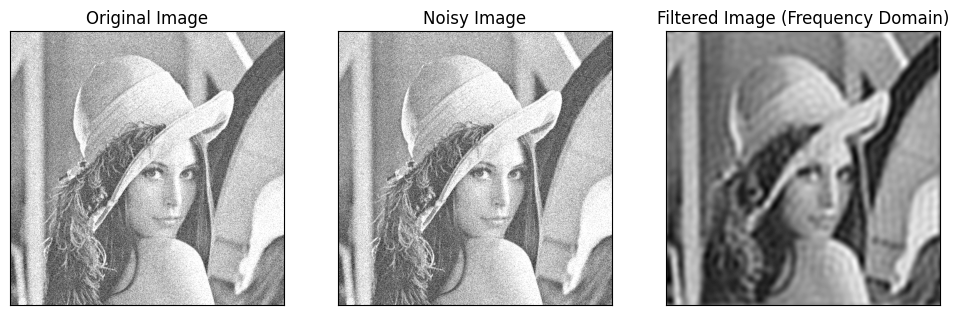

In [18]:
'''Noise Handling Using Fourier Transform'''

image = cv2.imread('Noisy_Lena.png', cv2.IMREAD_GRAYSCALE)

# Apply DFT
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)

# Create a mask for a low-pass filter
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
r = 30  # Radius of the low-pass filter
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

# Apply the mask to the DFT shifted image
fshift = dft_shifted * mask

# Applying Inverse DFT
f_ishift = np.fft.ifftshift(fshift)
image_back = cv2.idft(f_ishift)
image_back = cv2.magnitude(image_back[:, :, 0], image_back[:, :, 1])

# Normalize the image for displaying
cv2.normalize(image_back, image_back, 0, 255, cv2.NORM_MINMAX)
image_back = np.uint8(image_back)

# Display 
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(cv2.imread('Noisy_Lena.png', cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(image_back, cmap='gray')
plt.title('Filtered Image (Frequency Domain)'), plt.xticks([]), plt.yticks([])

plt.show()

